## Cost search (CS)

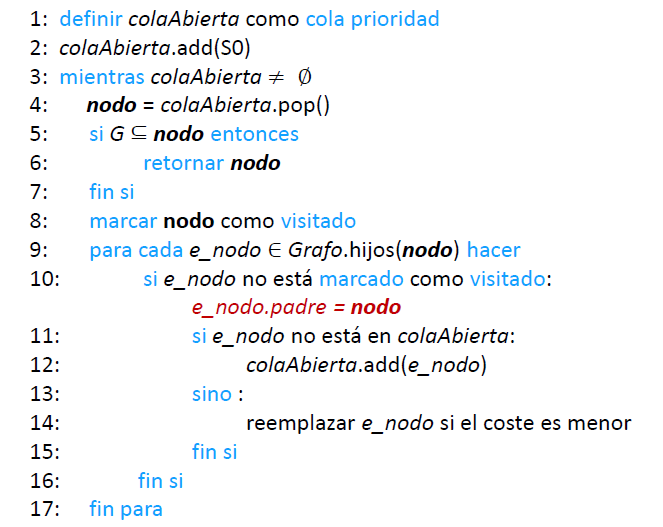

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Nodo:
    def __init__(self,nodo,nodosHijos=[],nodoPadre=None,costos=[],gn=0):
        self.nodo = nodo
        self.nodosHijos = nodosHijos
        self.nodoPadre = None
        self.costos = []
        self.gn = gn
    def __str__(self):
        formato = "{0}"
        return formato.format(self.nodo)
    def __eq__(self, obj):
        return (self.nodo==obj.nodo)
    def __hash__(self):
        return hash(self.nodo)

In [3]:
def sumar_costo_nodos(nodo):
    nodoTemp =nodo
    costo = 0
    while(nodoTemp):        
        nodoPadre = nodoTemp.nodoPadre        
        if not nodoPadre:
            break
        indice = nodoTemp.nodosHijos.index(nodoPadre) 
        costo += nodoTemp.costos[indice]
        nodoTemp = nodoPadre        
    return costo 

In [4]:
class CS:  
    def buscar(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]
        nodosAbiertos.append(nodoInicial)  
        contador = 0
        while nodosAbiertos:           
            nodo=nodosAbiertos.pop(0) 
            if nodo==nodoMeta:                
                return nodo,True,nodosVisitados            
            nodosVisitados.append(nodo)                            
            contador = contador +1          
            print(nodosAbiertos)
            for nodohijo in nodo.nodosHijos:               
                if not nodohijo in nodosVisitados:                                        
                    if not nodohijo in nodosAbiertos:                 
                        nodohijo.nodoPadre = nodo                          
                        nodosAbiertos.append(nodohijo)                        
                    else:
                        indice = nodosAbiertos.index(nodohijo)                         
                        nodoAnterior = nodosAbiertos[indice] 
                        padreTemp = nodohijo.nodoPadre
                        costoAnterior = sumar_costo_nodos(nodoAnterior)
                        nodohijo.nodoPadre = nodo                         
                        costoNuevo = sumar_costo_nodos(nodohijo)                        
                        print(costoAnterior,costoNuevo)
                        if costoNuevo < costoAnterior:                            
                            nodosAbiertos[indice] = nodohijo 
                        else:
                            nodohijo.nodoPadre = padreTemp
        return None,False,nodosVisitados
    
    def buscarGN(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]
        nodosAbiertos.append(nodoInicial)
        contador=0
        while nodosAbiertos:
            imprimir_lista_abiertos(nodosAbiertos)
            imprimir_lista_visitados(nodosVisitados)
            nodo=nodosAbiertos.pop(0)
            if nodo==nodoMeta:
                return nodo,True,nodosVisitados
            nodosVisitados.append(nodo)
            contador=contador+1
            for nodohijo in nodo.nodosHijos:
                if not nodohijo in nodosVisitados:
                    indice=nodo.nodosHijos.index(nodohijo)
                    costo=nodo.costos[indice]
                    if not nodohijo in nodosAbiertos:
                        nodohijo.nodoPadre=nodo
                        nodohijo.gn=nodo.gn+costo
                        nodosAbiertos.append(nodohijo)
                    else:
                        indice=nodosAbiertos.index(nodohijo)
                        nodoAnterior=nodosAbiertos[indice]
                        padreTemp=nodohijo.nodoPadre
                        costoAnterior=nodoAnterior.gn
                        costoNuevo=nodo.gn+costo
                        print(costoAnterior,costoNuevo)
                        if costoNuevo<costoAnterior:
                            nodohijo.nodoPadre=nodo
                            nodohijo.gn=costoNuevo
                            nodosAbiertos[indice]=nodohijo
                        else:
                            nodohijo.nodoPadre=padreTemp
            nodosAbiertos=sorted(nodosAbiertos,key=lambda x:x.gn, reverse=False)
        return None,False,nodosVisitados

In [5]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos 

In [6]:
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA), str(nodoB))],weight=j)  
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,5)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=1000,with_labels=True, font_weight='bold')        
    plt.show()

In [7]:
def imprimir_lista_abiertos(nodosAbiertos):    
    print("Nodos Abiertos")
    for nodoAbi in nodosAbiertos:
        print(str(nodoAbi)+"-"+str(nodoAbi.gn))
    print("----------------------")

In [8]:
def imprimir_lista_visitados(nodosVisitados):    
    print("Nodos Visitados")
    for nodoVis in nodosVisitados:
        print(str(nodoVis))
    print("----------------------")

In [9]:
def crear_diccinario(nodo,figura,nodoVisitado):
        if not nodo:
            return -1
        else:        
            if not nodo in nodoVisitado:
                figura[nodo] = nodo.nodosHijos
                nodoVisitado.append(nodo)
                for nodoVecino in nodo.nodosHijos:
                    crear_diccinario(nodoVecino,figura,nodoVisitado)

In [10]:
def mostrar_grafica(nodoInicial):
    figura={}
    crear_diccinario(nodoInicial,figura,[])    
    node_graph=nx.DiGraph(figura)
    plt.figure(figsize=(15,5)) 
    pos_labels=nx.circular_layout(node_graph)
    nx.draw_spectral(node_graph,with_labels=True, font_weight='bold')
    plt.show()

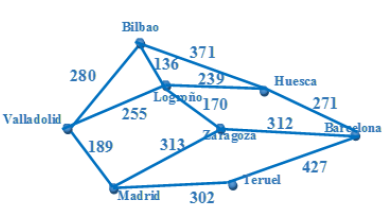

In [11]:
class FabricaNodos:
    def __init__(self):
        Valladolid = Nodo("Valladolid")
        Madrid = Nodo("Madrid")
        Huesca = Nodo("Huesca")
        Logrono = Nodo("Logroño")
        Bilbao = Nodo("Bilbao")
        Zaragoza = Nodo("Zaragoza")
        Barcelona = Nodo("Barcelona")
        Teruel = Nodo("Teruel")
        Valladolid.nodosHijos=[Bilbao,Logrono,Madrid]
        Valladolid.costos=[280,255,189]
        Bilbao.nodosHijos=[Valladolid,Logrono,Huesca]
        Bilbao.costos=[280,136,371]
        Logrono.nodosHijos=[Valladolid,Bilbao,Huesca,Zaragoza]
        Logrono.costos=[255,136,239,170]
        Zaragoza.nodosHijos=[Logrono,Madrid,Barcelona]
        Zaragoza.costos=[170,313,312]
        Madrid.nodosHijos=[Valladolid,Zaragoza,Teruel]
        Madrid.costos=[189,313,302]
        Teruel.nodosHijos=[Madrid,Barcelona]
        Teruel.costos=[302,427]
        Huesca.nodosHijos=[Bilbao,Logrono,Barcelona]
        Huesca.costos=[371,239,271]
        Barcelona.nodosHijos=[Huesca,Zaragoza,Teruel]
        Barcelona.costos=[271,312,427]
        self.Valladolid = Valladolid
        self.Madrid = Madrid
        self.Huesca = Huesca
        self.Logrono = Logrono
        self.Bilbao = Bilbao
        self.Zaragoza = Zaragoza
        self.Barcelona = Barcelona
        self.Teruel = Teruel         

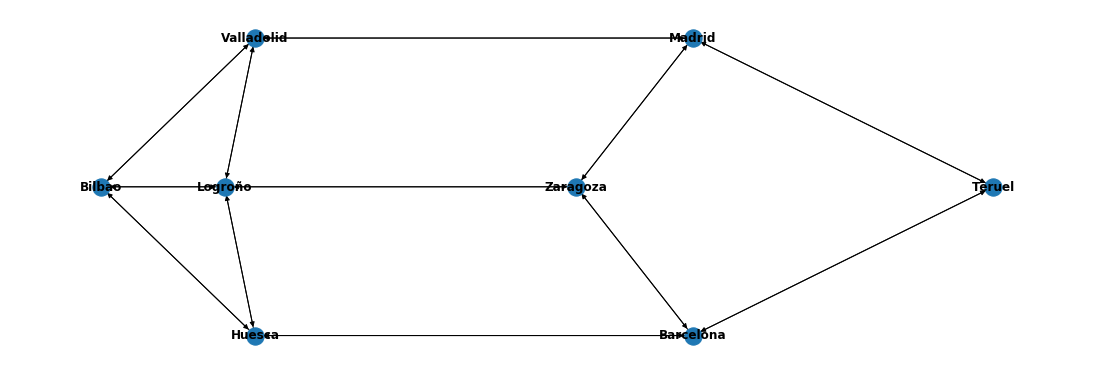

In [12]:
f = FabricaNodos()
mostrar_grafica(f.Valladolid)

[]
[<__main__.Nodo object at 0x000001EC05C11088>, <__main__.Nodo object at 0x000001EC05C11BC8>]
255 416
[<__main__.Nodo object at 0x000001EC05C11BC8>, <__main__.Nodo object at 0x000001EC05C11308>]
651 494


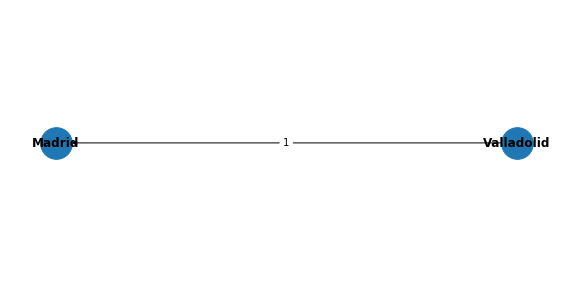

Nodos Visitados
Valladolid
Bilbao
Logroño
----------------------


In [13]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscar(f.Valladolid,f.Madrid)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

[]
[<__main__.Nodo object at 0x000001EC05C40848>, <__main__.Nodo object at 0x000001EC05C40B08>]
255 416
[<__main__.Nodo object at 0x000001EC05C40B08>, <__main__.Nodo object at 0x000001EC05C40808>]
651 494
[<__main__.Nodo object at 0x000001EC05C40808>, <__main__.Nodo object at 0x000001EC05C40988>]
425 502
[<__main__.Nodo object at 0x000001EC05C40988>, <__main__.Nodo object at 0x000001EC05C40A48>]
[<__main__.Nodo object at 0x000001EC05C40A48>, <__main__.Nodo object at 0x000001EC05C40A88>]
765 737
737 918


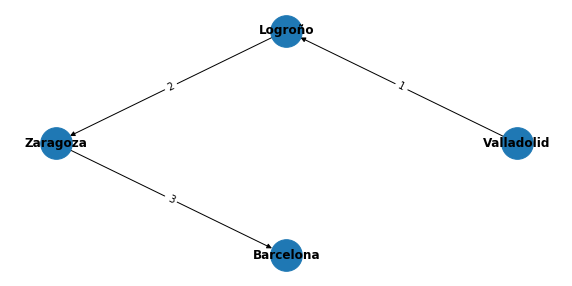

Nodos Visitados
Valladolid
Bilbao
Logroño
Madrid
Huesca
Zaragoza
Teruel
----------------------


In [14]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscar(f.Valladolid,f.Barcelona)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

Nodos Abiertos
Valladolid-0
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
Madrid-189
Logroño-255
Bilbao-280
----------------------
Nodos Visitados
Valladolid
----------------------
Nodos Abiertos
Logroño-255
Bilbao-280
Teruel-491
Zaragoza-502
----------------------
Nodos Visitados
Valladolid
Madrid
----------------------
280 391
502 425
Nodos Abiertos
Bilbao-280
Zaragoza-425
Teruel-491
Huesca-494
----------------------
Nodos Visitados
Valladolid
Madrid
Logroño
----------------------
494 651
Nodos Abiertos
Zaragoza-425
Teruel-491
Huesca-494
----------------------
Nodos Visitados
Valladolid
Madrid
Logroño
Bilbao
----------------------
Nodos Abiertos
Teruel-491
Huesca-494
Barcelona-737
----------------------
Nodos Visitados
Valladolid
Madrid
Logroño
Bilbao
Zaragoza
----------------------
737 918
Nodos Abiertos
Huesca-494
Barcelona-737
----------------------
Nodos Visitados
Valladolid
Madrid
Logroño
Bilbao
Zaragoza
Teruel
----------------------
737 765
Nodos 

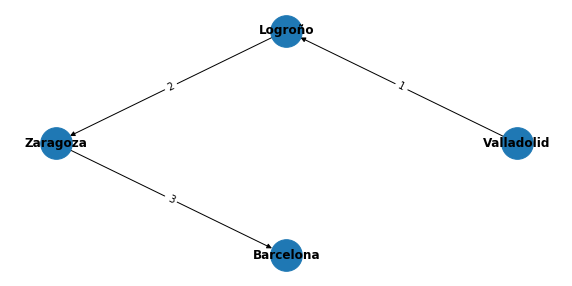

Nodos Visitados
Valladolid
Madrid
Logroño
Bilbao
Zaragoza
Teruel
Huesca
----------------------


In [15]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.Valladolid,f.Barcelona)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

Nodos Abiertos
Madrid-0
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
Valladolid-189
Teruel-302
Zaragoza-313
----------------------
Nodos Visitados
Madrid
----------------------
Nodos Abiertos
Teruel-302
Zaragoza-313
Logroño-444
Bilbao-469
----------------------
Nodos Visitados
Madrid
Valladolid
----------------------
Nodos Abiertos
Zaragoza-313
Logroño-444
Bilbao-469
Barcelona-729
----------------------
Nodos Visitados
Madrid
Valladolid
Teruel
----------------------
444 483
729 625
Nodos Abiertos
Logroño-444
Bilbao-469
Barcelona-625
----------------------
Nodos Visitados
Madrid
Valladolid
Teruel
Zaragoza
----------------------
469 580
Nodos Abiertos
Bilbao-469
Barcelona-625
Huesca-683
----------------------
Nodos Visitados
Madrid
Valladolid
Teruel
Zaragoza
Logroño
----------------------
683 840
Nodos Abiertos
Barcelona-625
Huesca-683
----------------------
Nodos Visitados
Madrid
Valladolid
Teruel
Zaragoza
Logroño
Bilbao
----------------------
683 896
Nod

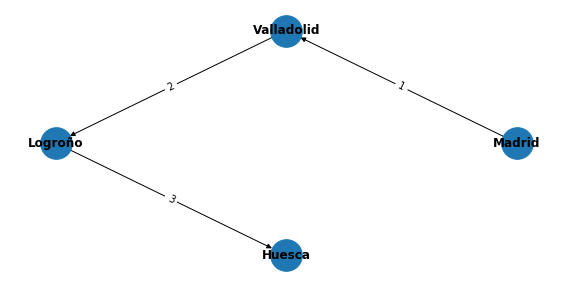

Nodos Visitados
Madrid
Valladolid
Teruel
Zaragoza
Logroño
Bilbao
Barcelona
----------------------


In [16]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.Madrid,f.Huesca)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

In [19]:
class FabricaPrueba:
    def __init__(self):
        I = Nodo("I")
        A = Nodo("A")
        B = Nodo("B")
        C = Nodo("C")
        G = Nodo("G")        
        I.nodosHijos=[A,B]
        I.costos=[5,4]
        A.nodosHijos=[I,B,C]
        A.costos=[5,3,3]
        B.nodosHijos=[I,A,G]
        B.costos=[4,3,10]
        C.nodosHijos=[A,G]
        C.costos=[3,6]
        G.nodosHijos=[C,B]
        G.costos=[6,10]
        self.I = I
        self.A = A
        self.B = B
        self.C = C
        self.G = G

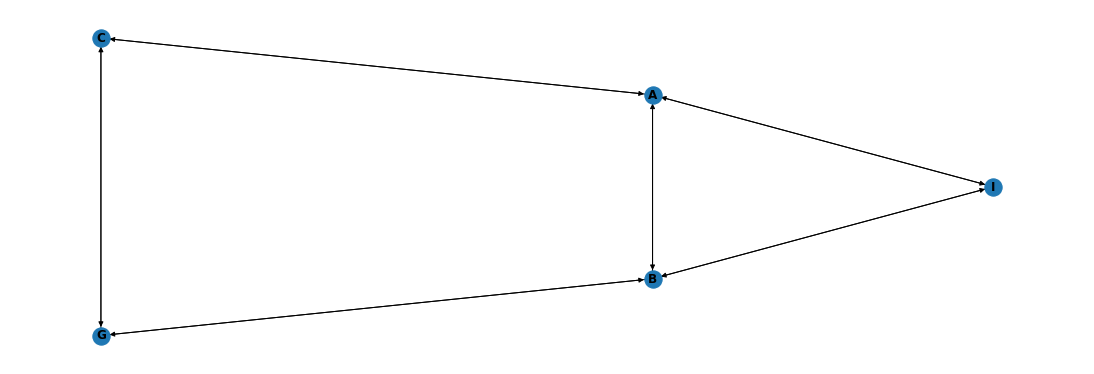

Nodos Abiertos
I-0
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
B-4
A-5
----------------------
Nodos Visitados
I
----------------------
5 7
Nodos Abiertos
A-5
G-14
----------------------
Nodos Visitados
I
B
----------------------
Nodos Abiertos
C-8
G-14
----------------------
Nodos Visitados
I
B
A
----------------------
14 14
Nodos Abiertos
G-14
----------------------
Nodos Visitados
I
B
A
C
----------------------


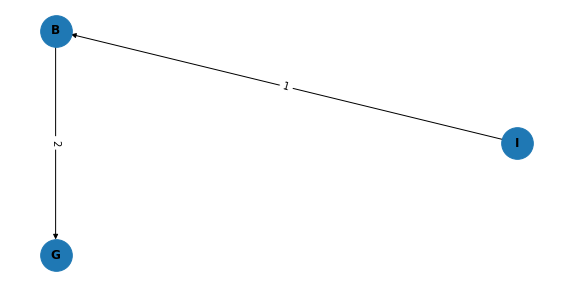

Nodos Visitados
I
B
A
C
----------------------


In [20]:
f = FabricaPrueba()
mostrar_grafica(f.I)
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.I,f.G)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)